## Primer: iskanje neslanih šal

## Example: finding unfunny jokes

Tokrat si bomo ogledali zbirko podatkov Jester, ki je dokaj podobna tisti pri domači nalogi. Gre za zbirko 100 šal (vicev), ki jih je ocenilo 23500 uporabnikov z oceno $-10$ (porazno) do $10$ (odlično). Ocena je torej zvezna spremenljivka. 

Naš glavni cilj bo modeliranje statistik v podatkovni zbirki z uporabo znanih porazdelitev. To nam bo omogočalo, da  **med šalami poiščemo osamelce** in ocenimo njihovo statistično značilnost - verjetnost, da gre za osamelca ali ne. 


Začnimo z naključno šalo iz podatkovne zbirke:

``A mechanical, electrical and a software engineer from Microsoft were driving through the desert when the car broke down. The mechanical engineer said "It seems to be a problem with the fuel injection system, why don't we pop the hood and I'll take a look at it." To which the electrical engineer replied, "No I think it's just a loose ground wire, I'll get out and take a look." Then, the Microsoft engineer jumps in. "No, no, no. If we just close up all the windows, get out, wait a few minutes, get back in, and then reopen the windows everything will work fine."``

This time we will look at the Jester dataset, which is quite similar to that of the homework. It is a collection of 100 jokes rated by 23,500 users with a rating of $-10$ (disastrous) to $10$ (excellent). The assessment is therefore a continuous variable.

Our main goal will be to model statistics in a dataset using known distributions. This will allow us to find **outliers among the jokes** and evaluate their statistical significance - the likelihood that it is an outlier or not.


Let's start with a random joke from the dataset:

``A mechanical, electrical and a software engineer from Microsoft were driving through the desert when the car broke down. The mechanical engineer said "It seems to be a problem with the fuel injection system, why don't we pop the hood and I'll take a look at it." To which the electrical engineer replied, "No I think it's just a loose ground wire, I'll get out and take a look." Then, the Microsoft engineer jumps in. "No, no, no. If we just close up all the windows, get out, wait a few minutes, get back in, and then reopen the windows everything will work fine."``

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.pyplot as plt
plt.style.use('PR.mplstyle')
import numpy as np

Podatki so matrika velikosti $23500 \times 100$ z zveznimi vrednosti. Vrednost $99$ predstavlja neznano vrednost, takih vrednosti zato ne smemo upoštevati.

The data is a matrix of magnitude $23500 \times 100$ with continuous values. The value of $99$ represents an unknown value; therefore, such values ​​must not be taken into account.

In [2]:
X = np.genfromtxt('podatki/jester-data.csv', delimiter=',',)[:, 1:]
X[np.where(X == 99)] = float("nan")  # neznanih vrednosti ne smemo upoštevati

print("velikost:", X.shape)
print("skupno število ocen:", X.size - np.sum(np.isnan(X)))

velikost: (23500, 100)
skupno število ocen: 1708993


Poglejmo, kakšna je porazdelitev vseh veljavnih ocen.

Let's see what is the distribution of all valid ratings.

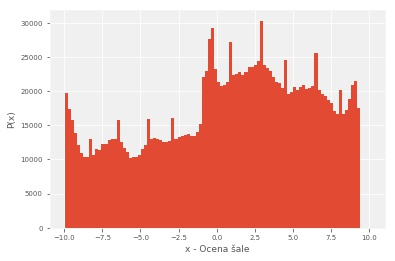

In [3]:
data = X[np.isnan(X) == False]
plt.hist(data, bins=100)
plt.xlabel("x - Ocena šale")
plt.ylabel("P(x)");

Vidimo, da je večina ocen nevtralnih (okoli 0), veliko pozitivnih (med 3 in 10) ter nekaj zelo slabih (-10). Najmanj je srednje slabih (-9 do -1). Navkljub temu ima ta porazdelitev naslednje težave:
 * Vzorec ni nepristranski. Vsak uporabnik je ocenil različno število šal.
 * Porazdelitev ne spominja na nobeno od znanih.

Kako bi primerjali šale glede na njihove ocene?

We see that most ratings are neutral (around 0), many positive (between 3 and 10) and some very bad (-10). The least is the average bad (-9 to -1). Nevertheless, this distribution has the following problems:
* The sample is not impartial. Each user rated a different number of jokes.
* The distribution does not look like any of the known.

How would you compare the jokes with respect to their grades?

Poglejmo najprej, koliko veljavnih ocen je prejela vsaka od šala:

Let's first look at how many valid ratings each joke received:

In [4]:
(np.isnan(X) == False).sum(axis=0)  # vsota po posameznih šalah

array([15507, 16954, 15755, 14901, 23498, 19154, 23497, 23497, 14988,
       18943, 20480, 21019, 23499, 21205, 23499, 23497, 23499, 23497,
       23497, 23498, 23471, 20177, 18706, 15188, 19502, 22383, 23438,
       22551, 23467, 17002, 23204, 23481, 15774, 20372, 23486, 23499,
       15941, 21481, 21870, 21039, 17599, 23202, 16656, 15472, 19974,
       22208, 20875, 23333, 23492, 23499, 17795, 18752, 23498, 23240,
       18589, 23328, 15212, 14913, 17212, 16814, 23401, 23461, 18927,
       16439, 23304, 23458, 16576, 23459, 23446, 19100,  8164,  8288,
        8231,  8392,  8393,  8513,  8551,  8494,  8586,  8643,  8712,
        8799,  8865,  8892,  9054,  9057,  8953,  9148,  9098,  9309,
        9314,  9432,  9530,  9660,  9756,  9890, 10082, 10180, 10310,  9547])

Vsaka šala je dobila nekaj tisoč ocen, kar zadostuje za statistično primerjavo.

Each joke received a few thousand ratings, which is sufficient for a statistical comparison.

Zamislimo si dve novi naključni spremenljivki:
    
* $X$ povprečje ocen posamezne šale,
* $Y$ varianca ocen posamezne šale.

**Pomembno:** spremenljivki sta izpeljani iz dveh izračunljivih količih. Spremenljivki $X$ in $Y$ nista parametra normalne porazdelitve!

Za vsako od navedenih spremenljivk $X$ in $Y$ imamo torej vzorec velikosti 100, po en primer za vsako šalo. Pri izračunu pazimo, da preskočimo neznane vrednosti:

Let's imagine two new random variables:
    
* $X$ is the average of individual jokes,
* $Y$ is the variance of individual jokes.

**Important:** The variables are derived from two calculated quantities. The variables $X$ and $Y$ are not parameters of normal distribution!

For each of these variables $X$ and $Y$ we have a sample size of 100, one case for each joke. In calculating, we should skip the unknown values:

In [5]:
means     = []
variances = []
for i in range(X.shape[1]):
    s = np.mean(X[:, i][np.isnan(X[:, i]) == False])
    v = np.var(X[:, i][np.isnan(X[:, i]) == False])
    means.append(s)
    variances.append(v)

##### Vprašanje 3-2-1

Kakšna je interpretacija spremeljivk $X$ in $Y$? Kaj pomeni, če ima šala visoko varianco med vsemi ocenami? Kaj pomeni, če ima šala visoko povprečno oceno?

##### Question 3-2-1

What is the interpretation of $X$ and $Y$? What does it mean if the joke has a high variance among all ratings? What does it mean if a joke has a high average rating?

[Odgovor](203-2.ipynb#Odgovor-3-2-1)

[Answer](203-2.ipynb#Answer-3-2-1)

Izpišimo nekaj najbolje, najslabše ocenjenih šal ter nekaj takih z visoko oz. nizko varianco. Za zabavo jih lahko prebereš in primerjaš, n. pr., odpri datoteko ``podatki/jokes/init1.html``:

``A man visits the doctor. The doctor says "I have bad news for you. You have
cancer and Alzheimer's disease". The man replies "Well, thank God I don't have cancer!"``

Let's write out some of the best, worst rated jokes, and some with a high and low variance. You can read and compare them for fun, e.g., open the file ``podatki/jokes/init1.html``:

``A man visits the doctor. The doctor says "I have bad news for you. You have
cancer and Alzheimer's disease". The man replies "Well, thank God I don't have cancer!"``

In [6]:
n = 3
for data, name in [(means, "Povprečje (X)"), (variances, "Varianca (Y)")]: 
    inxs = np.argsort(data)[:n]
    print("Kriterij: %s" % name)
    print("\tSpodnjih %d:" % n)
    for i in inxs:
        print("\t\tšala %d, povp.: %.2f, var.: %.2f" % (i+1, means[i], variances[i]))
        
    inxs = np.argsort(data)[::-1][:n]
    print("\tZgornjih %d:" % n)
    for i in inxs:
        print("\t\tšala %d, povp.: %.2f, var.: %.2f" % (i+1, means[i], variances[i]))
    print()

Kriterij: Povprečje (X)
	Spodnjih 3:
		šala 58, povp.: -3.57, var.: 26.56
		šala 16, povp.: -2.89, var.: 25.60
		šala 15, povp.: -2.18, var.: 26.20
	Zgornjih 3:
		šala 89, povp.: 3.46, var.: 24.32
		šala 50, povp.: 3.45, var.: 19.06
		šala 32, povp.: 3.00, var.: 21.28

Kriterij: Varianca (Y)
	Spodnjih 3:
		šala 50, povp.: 3.45, var.: 19.06
		šala 17, povp.: -1.19, var.: 19.47
		šala 36, povp.: 2.92, var.: 20.37
	Zgornjih 3:
		šala 71, povp.: -0.98, var.: 34.07
		šala 2, povp.: 0.10, var.: 32.03
		šala 7, povp.: -0.49, var.: 31.34



Narišimo še porazdelitvi vzorcev $X$ in $Y$.

Let's also draw up the distribution of samples $X$ and $Y$.

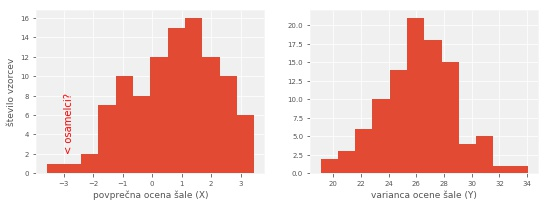

In [7]:
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.hist(means, normed=False, bins=12)
plt.xlabel("povprečna ocena šale (X)")
plt.ylabel("število vzorcev")
plt.text(-3, 2, "< osamelci?", rotation=90, verticalalignment="bottom", color="red")

plt.subplot(1, 2, 2)
plt.hist(variances, normed=False, bins=12)
plt.xlabel("varianca ocene šale (Y)");

Tole izgleda že bolje. Večina šal je torej v povprečju ocenjenih pozitivno, zelo malo je negativnih. Porazdelitvi spominjata na znane porazdelitve, kjer je večina primerov (šal) porazdeljenih okoli srednje vrednosti, manj pa je ekstremnih vrednosti.

Poglejmo za trenutek porazdelitev povprečnih ocen. Izgleda, da imamo nekaj **osamelcev** - zelo slabih šal, ocenjenih z manj kot $X = -2$. Kako pomenljiv je padec od $X = -2$ navzdol? Da bi odgovorili na to vprašanje, spoznajmo osnove modeliranja podatkov s pomočjo verjetnostnih porazdelitev.

Povprečna ocena izgleda normalno porazdeljena. Kakšni so najbolj verjetni parametri porazdelitve?

This looks better. Most jokes are therefore on average positive, very few are negative. The distribution look like familiar distributions, where the majority of cases (jokes) are distributed around the mean value, but there are fewer extreme values.

Let's look for a moment at the distribution of average ratings. It seems that we have some **outliers** - very bad jokes rated less than $X = -2$. How significant is the drop from $X = -2$ down? To answer this question, let us learn the basics of data modeling using probability distributions.

The average rating seems to be normally distributed. What are the most likely distribution parameters?

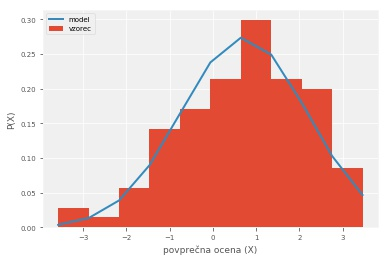

In [8]:
from scipy.stats import multivariate_normal as mvn

data = means
    
# Ocenimo parametre normalne (Gaussove) porazdelitve
n = len(data)
mu = np.mean(data)              # ocena sredine
sigma2 = (n-1)/n * np.var(data) # ocena variance

plt.figure()
counts, bins, _ = plt.hist(data, normed=True, label="vzorec", bins=10)    # dobimo razpon
pdf = [mvn.pdf(x, mu, sigma2) for x in bins]                              # pdf: [p]robability [d]ensity [f]unction
plt.plot(bins, pdf, "-", label="model", linewidth=2.0)
plt.xlabel("povprečna ocena (X)")
plt.ylabel("P(X)")

plt.legend(loc=2);

Na oko lahko ocenimo, da se porazdelitev kar dobro ujema z vzorcem. Kako statistično značilne so šale, ki imajo vrednost meritve manjšo od $X=-2.0$? *Kako nenavadno slabe so v resnici te šale?* Za odgovor na to vprašanje bomo izračunali t.i. *p-vrednost*. S pomočjo p-vrednosti ocenimo *nenavadnost* meritve, v našem primeru povprečne ocene šale.

**Definicija.** P-vrednost je verjetnost, da pri vzorčenju ene vrednosti naključne spremenljivke dobimo dano ali manjšo (oz. večjo) vrednost. 

Definicijo si najlažje ogledamo grafično. Oglejmo si funkcijo porazdelitve, dobljeno z ocenjenima parametroma $\mu$ in $\sigma^2$.

We can estimate that the distribution quite well matches the pattern. How statistically significant are jokes with a measurement value less than $X=-2.0$? *How unusually bad are these jokes really?* In order to answer this question we will calculate the so called *p-value*. Using the p-value, we evaluate *the oddness* of the measurement, in our case, the average joke rating.

**Definition.** The p-value is the probability that a given or less (or greater) value is obtained when sampling one value of the random variable.

The easiest way to look at the definition is graphically. Let's look at the distribution function obtained with the estimated parameters $\mu$ and $\sigma^2$.

Verjetnost šale z oceno -2.000 ali manj: 3.019 %
Nenavadnost šale JE statistično značilna (prag = 5.000 %)


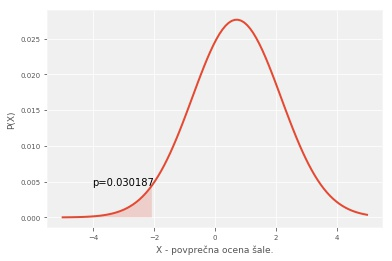

In [9]:
# Meritev, ki bi jo radi statisticno ocenili  
qx = -2


# Izračunamo P(x) za dovolj velik interval
xr    = np.linspace(-5, 5, 100)
width = xr[1] - xr[0]       # sirina intervala
Px = [mvn.pdf(x, mu, sigma2) * (xr[1]-xr[0])   for x in xr]


# Vse vrednosti, ki so manjše ali enake od qx
ltx     = xr[xr <= qx]      

# Množimo s širino intervala, da dobimo ploščino pod krivuljo
P_ltx = [mvn.pdf(x, mu, sigma2) * width for x in ltx] 
                            
# p-vrednost: ploscina pod krivuljo P(x) za vse vrednosti, manjse od qx
p_value = np.sum(P_ltx)

# Graf funkcije
plt.figure()
plt.plot(xr, Px, linewidth=2.0)
plt.fill_between(ltx, 0, P_ltx, alpha=0.2)
plt.text(qx, mvn.pdf(qx, mu, sigma2) * width, 
         "p=%f" % p_value,  
         horizontalalignment="right",
         verticalalignment="center",
        )

plt.xlabel("X - povprečna ocena šale.")
plt.ylabel("P(X)")
plt.legend()


# Poglejmo, ali je meritev statistično značilna pri danem pragu alpha (0.05, 0.01, 0.001 ... )
alpha = 0.05
if p_value < alpha:
        sig = "JE"
else:
        sig = "NI"

# Rezultat statističnega testa
print("Verjetnost šale z oceno %.3f ali manj: " % qx + "%.3f" % (100 * p_value) +  " %")
print("Nenavadnost šale %s statistično značilna (prag = %.3f" % (sig, 100*alpha), "%)")

Sedaj lahko za vsako ekstremno vrednost v podatkih (bodisi visoko ali nizko) <i>statistično</i> ocenimo vrednost njene nenavadnosti. Pri postavljenem pragu npr. $\alpha = 0.05$ lahko sprejmemo odločitev, ali je neka meritev osamelec ali ne.

Now, for every extreme value in the data (either high or low), we can estimate <i>statistically</i> the value of its unusuality. At the set threshold, e.g. $\alpha = 0.05$ we can make a decision whether or not some measurements are outliers or not.

##### Vprašanje 3-2-2

Izpiši vse šale osamelce, katerih povprečna ocena $X$ je statistično značilna, pri pragu $\alpha=0.05$. Poišči tudi osamelce med *dobro ocenjenimi* šalami.

##### Question 3-2-2

Write out all the outlier jokes whose average estimate of $X$ is statistically significant at the threshold of $\alpha=0.05$. Find also the outliers among *well-rated* jokes.

[Odgovor](203-2.ipynb#Odgovor-3-2-2)

[Answer](203-2.ipynb#Answer-3-2-2)

##### Vprašanje 3-2-3

Poizkusi porazdelitev modelirati z drugimi porazdelitvami (Student, Beta). Je katera od teh porazdelitev bolj primerna?

##### Question 3-2-3

Try modelin the distribution with other distributions (Student's, Beta). Is any of these distributions more appropriate?

[Odgovor](203-2.ipynb#Odgovor-3-2-3)

[Answer](203-2.ipynb#Answer-3-2-3)

##### Vprašanje 3-2-4

Ponovi analizo za spremenljivko $Y$ - varianca ocen šale. Odgovori na vprašanja:
* Katera od porazdelitev (normalna, Student, Beta) se najbolje prilega vzorcu?
* Katere so statistično značilne šale (z visoko ali nizko varianco)?
* Kaj pomeni, če ima šala visoko ali nizko vrednost $Y$?

##### Question 3-2-4

Repeat the analysis for the variable $Y$ - variance of joke ratings. Answer the questions:
* Which of the distributions (Normal, Student, Beta) best fits the pattern?
* What are statistically significant jokes (with high or low variance)?
* What does it mean if the joke has a high or low value of $Y$?

[Odgovor](203-2.ipynb#Odgovor-3-2-4)

[Answer](203-2.ipynb#Answer-3-2-4)